In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from gensim.models import word2vec, KeyedVectors
from tqdm import tqdm
import japanize_matplotlib

In [2]:
tqdm.pandas()

In [4]:
DATADIR = Path("../../data/")

anime = pd.read_csv(DATADIR / "anime.csv")

In [50]:
anime["genres"].str.split(", ")

0          [Comedy, Sci-Fi, Seinen, Slice of Life, Space]
1       [Adventure, Slice of Life, Mystery, Historical...
2       [Adventure, Slice of Life, Mystery, Historical...
3                        [Comedy, Ecchi, Fantasy, School]
4        [Comedy, Harem, Romance, Sci-Fi, Shounen, Space]
                              ...                        
1995    [Adventure, Romance, Mecha, Military, Sci-Fi, ...
1996                             [Ecchi, Romance, School]
1997                  [Action, Fantasy, Military, Sci-Fi]
1998         [Action, Adventure, Fantasy, School, Sci-Fi]
1999    [Action, Mecha, Romance, Super Power, Supernat...
Name: genres, Length: 2000, dtype: object

In [107]:
import random
org_genre_list = anime["genres"].str.split(", ").values.tolist()
shuffled_genre_list = [random.sample(genre, len(genre)) for genre in org_genre_list]

In [110]:
w2v_model = word2vec.Word2Vec(
    org_genre_list + shuffled_genre_list,
    vector_size=100,
    min_count=1,
    window=3
)

In [111]:
import itertools
unique_genres_val = list(set(itertools.chain.from_iterable([col for col in anime["genres"].str.split(", ")])))

In [112]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [119]:
output = {}
for col in unique_genres_val:
    output[col] = cos_sim(w2v_model.wv["Drama"], w2v_model.wv[col])

sorted(output.items(), key = lambda output : output[1], reverse=True)

[('Drama', 1.0),
 ('Seinen', 0.99859107),
 ('Mecha', 0.9981043),
 ('Dementia', 0.9980684),
 ('Parody', 0.9980604),
 ('Music', 0.9980454),
 ('Historical', 0.997899),
 ('Shoujo', 0.99788976),
 ('Shounen Ai', 0.9978406),
 ('Police', 0.9978339),
 ('Mystery', 0.9978291),
 ('Supernatural', 0.9977675),
 ('Game', 0.9976383),
 ('Samurai', 0.9976097),
 ('Thriller', 0.99759823),
 ('Demons', 0.99756855),
 ('Horror', 0.9975308),
 ('Sci-Fi', 0.9975252),
 ('Action', 0.9975139),
 ('Psychological', 0.9975036),
 ('Shounen', 0.9974772),
 ('Super Power', 0.9974735),
 ('Ecchi', 0.99746406),
 ('Slice of Life', 0.9974344),
 ('Romance', 0.997418),
 ('Comedy', 0.9973998),
 ('School', 0.99738127),
 ('Magic', 0.99728674),
 ('Military', 0.99724925),
 ('Josei', 0.99722844),
 ('Fantasy', 0.99720436),
 ('Vampire', 0.9970765),
 ('Adventure', 0.99687093),
 ('Space', 0.9968259),
 ('Sports', 0.99653184),
 ('Harem', 0.9964731),
 ('Martial Arts', 0.9964157),
 ('Cars', 0.9962014),
 ('Shoujo Ai', 0.9960904),
 ('Kids', 0.995

In [120]:
anime["genres"]

0            Comedy, Sci-Fi, Seinen, Slice of Life, Space
1       Adventure, Slice of Life, Mystery, Historical,...
2       Adventure, Slice of Life, Mystery, Historical,...
3                          Comedy, Ecchi, Fantasy, School
4          Comedy, Harem, Romance, Sci-Fi, Shounen, Space
                              ...                        
1995    Adventure, Romance, Mecha, Military, Sci-Fi, H...
1996                               Ecchi, Romance, School
1997                    Action, Fantasy, Military, Sci-Fi
1998           Action, Adventure, Fantasy, School, Sci-Fi
1999    Action, Mecha, Romance, Super Power, Supernatu...
Name: genres, Length: 2000, dtype: object

In [121]:
# 各文章ごとにそれぞれの単語をベクトル表現に直し、平均をとって文章ベクトルにする
sentence_vectors = anime["genres"].str.split(", ").progress_apply(
    lambda x: np.mean([w2v_model.wv[e] for e in x], axis=0))

sentence_vectors = np.vstack([x for x in sentence_vectors])

sentence_vector_df = pd.DataFrame(
    sentence_vectors,
    columns=[f"genres_w2v_{idx}" for idx in range(100)]
)

sentence_vector_df.index = anime["genres"]

100%|██████████| 2000/2000 [00:00<00:00, 77520.13it/s]


In [122]:
sentence_vector_df

,genres_w2v_0,genres_w2v_1,genres_w2v_2,genres_w2v_3,genres_w2v_4,genres_w2v_5,genres_w2v_6,genres_w2v_7,genres_w2v_8,genres_w2v_9,genres_w2v_10,genres_w2v_11,genres_w2v_12,genres_w2v_13,genres_w2v_14,genres_w2v_15,genres_w2v_16,genres_w2v_17,genres_w2v_18,genres_w2v_19,genres_w2v_20,genres_w2v_21,genres_w2v_22,genres_w2v_23,genres_w2v_24,genres_w2v_25,genres_w2v_26,genres_w2v_27,genres_w2v_28,genres_w2v_29,genres_w2v_30,genres_w2v_31,genres_w2v_32,genres_w2v_33,genres_w2v_34,genres_w2v_35,genres_w2v_36,genres_w2v_37,genres_w2v_38,genres_w2v_39,genres_w2v_40,genres_w2v_41,genres_w2v_42,genres_w2v_43,genres_w2v_44,genres_w2v_45,genres_w2v_46,genres_w2v_47,genres_w2v_48,genres_w2v_49,genres_w2v_50,genres_w2v_51,genres_w2v_52,genres_w2v_53,genres_w2v_54,genres_w2v_55,genres_w2v_56,genres_w2v_57,genres_w2v_58,genres_w2v_59,genres_w2v_60,genres_w2v_61,genres_w2v_62,genres_w2v_63,genres_w2v_64,genres_w2v_65,genres_w2v_66,genres_w2v_67,genres_w2v_68,genres_w2v_69,genres_w2v_70,genres_w2v_71,genres_w2v_72,genres_w2v_73,genres_w2v_74,genres_w2v_75,genres_w2v_76,genres_w2v_77,genres_w2v_78,genres_w2v_79,genres_w2v_80,genres_w2v_81,genres_w2v_82,genres_w2v_83,genres_w2v_84,genres_w2v_85,genres_w2v_86,genres_w2v_87,genres_w2v_88,genres_w2v_89,genres_w2v_90,genres_w2v_91,genres_w2v_92,genres_w2v_93,genres_w2v_94,genres_w2v_95,genres_w2v_96,genres_w2v_97,genres_w2v_98,genres_w2v_99
genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Comedy, Sci-Fi, Seinen, Slice of Life, Space",-0.064404,0.100166,0.082485,0.087368,-0.019265,-0.110406,0.109239,0.268897,-0.160161,-0.216924,0.009384,-0.206369,0.037189,0.106069,0.053242,-0.085654,0.251189,0.018178,-0.042700,-0.362264,0.106052,0.024687,0.232317,-0.051484,-0.035786,0.111812,-0.174858,0.117978,-0.074194,0.144887,0.154591,-0.118415,0.060497,-0.330401,-0.070756,0.115426,0.074642,0.016422,-0.110980,-0.018109,0.106417,-0.125079,-0.075758,0.105341,0.116993,-0.133537,-0.116966,-0.124512,0.087980,0.050034,0.061141,-0.078422,-0.023569,-0.076832,-0.075613,-0.019186,0.070503,-0.025404,0.001833,0.034933,-0.064735,-0.141744,0.223926,0.114387,-0.097395,0.243366,0.038432,0.187364,-0.197015,0.084218,0.065079,0.164774,0.145415,0.072927,0.165929,0.070250,0.093123,0.134878,-0.023667,-0.030280,-0.272866,-0.091649,0.047196,0.117218,-0.044297,-0.105320,0.195144,-0.004622,0.084768,0.068141,0.152481,0.046117,0.084415,-0.119763,0.226511,0.045185,0.106233,-0.030982,0.067183,0.097308
"Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen",-0.064670,0.106105,0.087546,0.087753,-0.011025,-0.109417,0.119164,0.280760,-0.165590,-0.226016,0.006646,-0.214875,0.039676,0.108196,0.059424,-0.089448,0.260053,0.021790,-0.045372,-0.372781,0.110387,0.024918,0.243491,-0.052757,-0.044393,0.120899,-0.181485,0.120861,-0.072919,0.150059,0.160378,-0.125393,0.056741,-0.341562,-0.070737,0.116711,0.074791,0.017045,-0.117126,-0.018873,0.113190,-0.128548,-0.074761,0.110172,0.120732,-0.140494,-0.117500,-0.135783,0.090072,0.049924,0.062982,-0.089866,-0.024718,-0.085890,-0.078384,-0.016061,0.072492,-0.021237,0.007409,0.032831,-0.070452,-0.149650,0.236151,0.123846,-0.104296,0.255976,0.040957,0.200852,-0.209762,0.086984,0.067357,0.165511,0.158129,0.081328,0.166544,0.067248,0.094266,0.139350,-0.034119,-0.033940,-0.291658,-0.092898,0.046758,0.123255,-0.041857,-0.109489,0.208894,-0.002252,0.082436,0.062383,0.157291,0.042453,0.088421,-0.124345,0.234108,0.051979,0.119754,-0.031507,0.070905,0.100994
"Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen",-0.064670,0.106105,0.087546,0.087753,-0.011025,-0.109417,0.119164,0.280760,-0.165590,-0.226016,0.006646,-0.214875,0.039676,0.108196,0.059424,-0.089448,0.260053,0.021790,-0.045372,-0.372781,0.110387,0.024918,0.243491,-0.052757,-0.044393,0.120899,-0.181485,0.120861,-0.072919,0.150059,0.160378,-0.125393,0.056741,-0.341562,-0.070737,0.116711,0.074791,0.017045,-0.117126,-0.018873,0.113190,-0.128548,-0.074761,0.1101

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25, random_state=33).fit(sentence_vector_df)

/Users/shinichiro.saito/atmacup15/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [124]:
pd.set_option("display.max_columns", 100)

In [125]:
merge_df = pd.concat([anime["anime_id"], sentence_vector_df.reset_index(drop=True)],axis=1)
merge_df["anime_genre_cluster"] = kmeans.labels_

In [134]:
merge_df.to_csv("../../data/anime_genre_vector_and_cluster.csv", index=False)

In [135]:
merge_df.columns

Index(['anime_id', 'genres_w2v_0', 'genres_w2v_1', 'genres_w2v_2',
       'genres_w2v_3', 'genres_w2v_4', 'genres_w2v_5', 'genres_w2v_6',
       'genres_w2v_7', 'genres_w2v_8',
       ...
       'genres_w2v_91', 'genres_w2v_92', 'genres_w2v_93', 'genres_w2v_94',
       'genres_w2v_95', 'genres_w2v_96', 'genres_w2v_97', 'genres_w2v_98',
       'genres_w2v_99', 'anime_genre_cluster'],
      dtype='object', length=102)

# 可視化

In [126]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(sentence_vector_df)

In [128]:
from adjustText import adjust_text

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


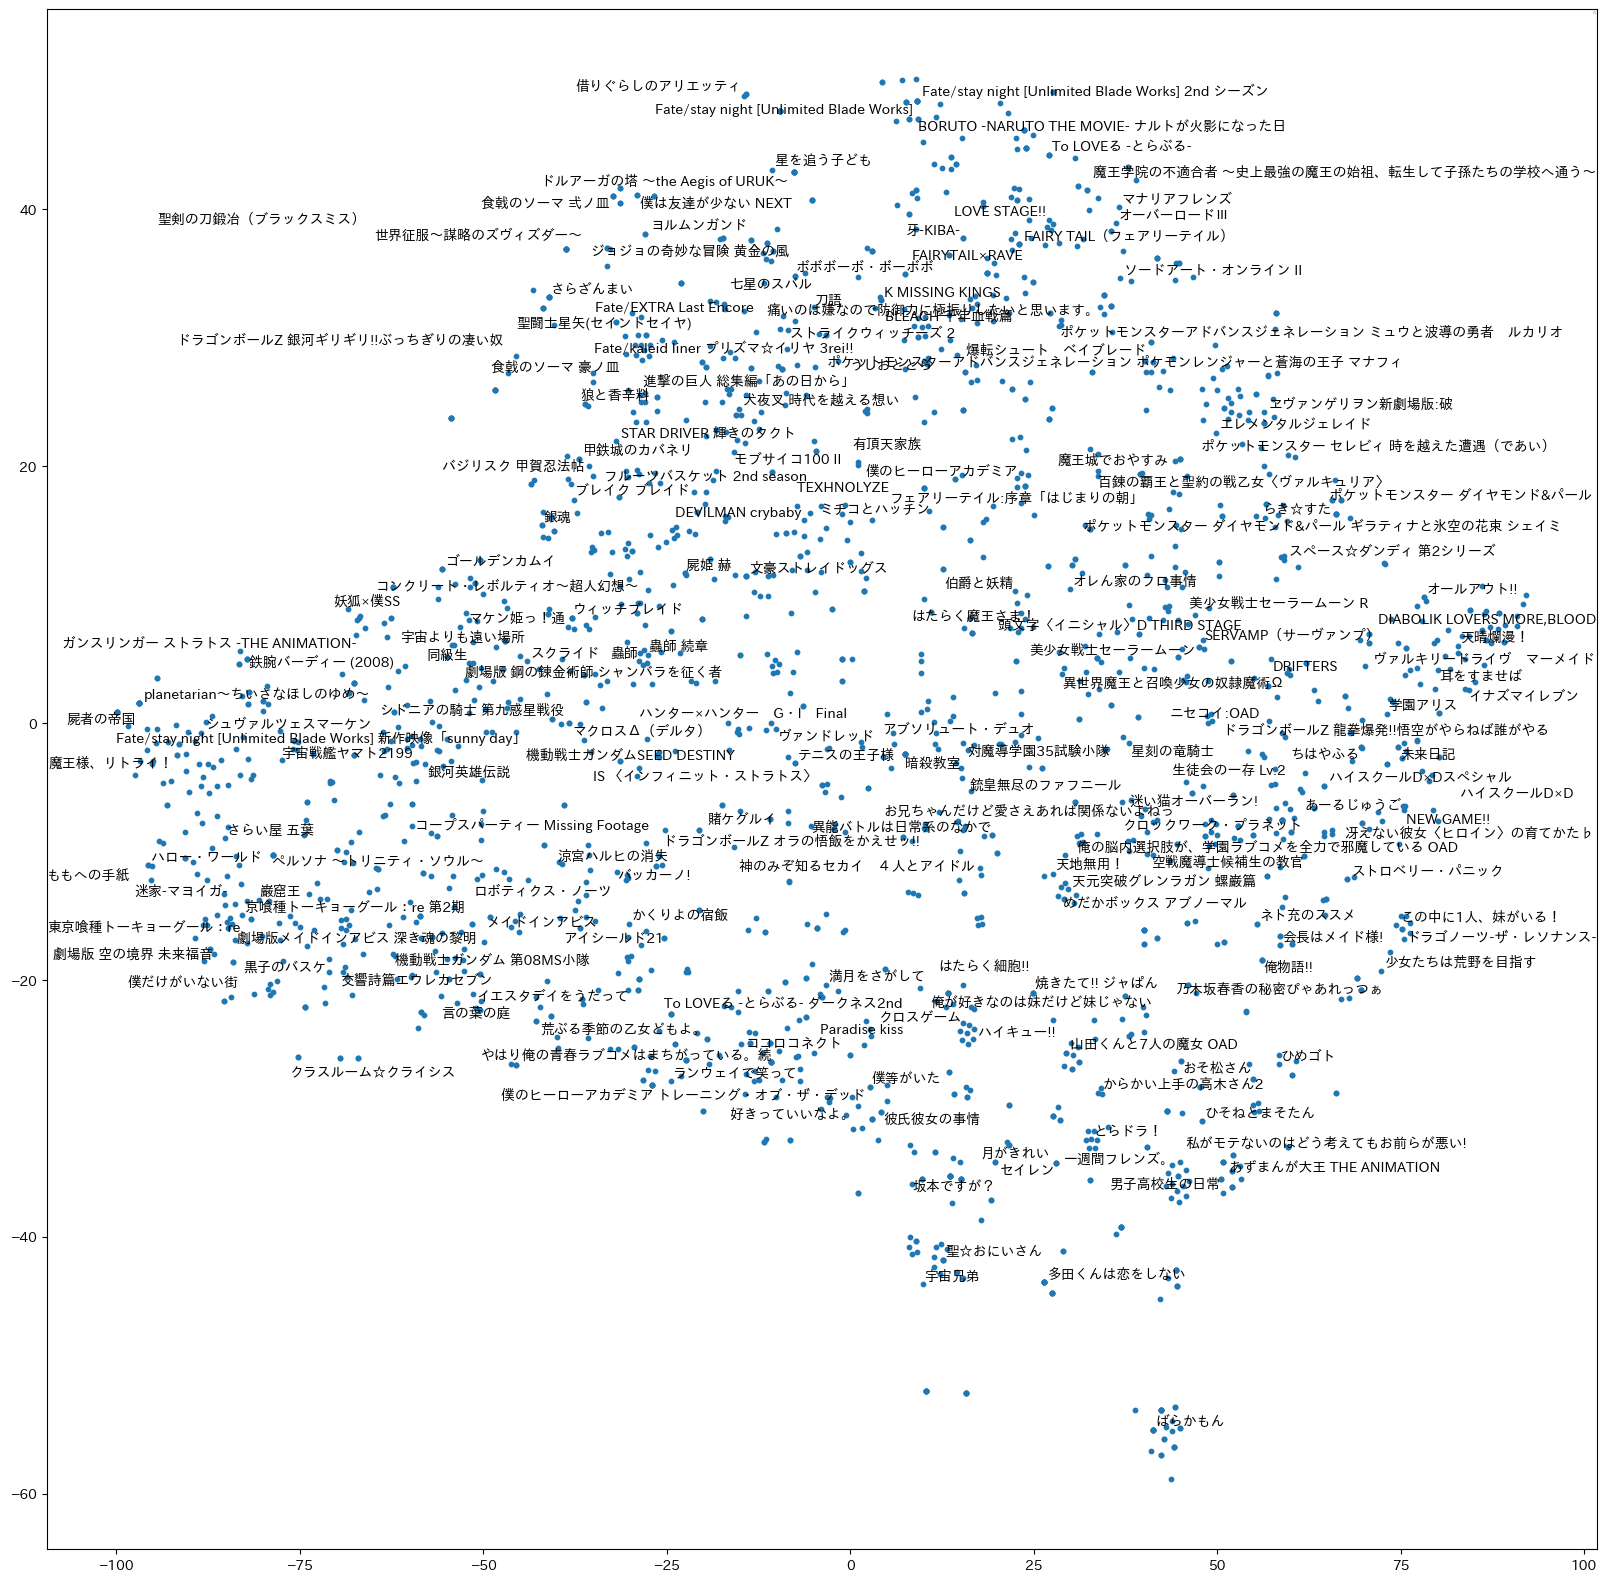

In [129]:
ddf = pd.concat([anime, pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)

name_list = ddf["japanese_name"].unique()

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(*X_embedded.T, s=10, )

texts = [ax.text(x, y, value) for x, y, value in zip(*X_embedded.T, name_list[:200]) ]
adjust_text(texts)

plt.legend(fontsize = 2)

In [ ]:
ddf

,anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch,col1,col2
0,000ba7f7e34e107e7544,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",宇宙兄弟,TV,99,"Apr 1, 2012 to Mar 22, 2014","Aniplex, Dentsu, YTV, Trinity Sound",Sentai Filmworks,A-1 Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,150428,16552,37234,13009,6948,76685,55.437862,14.186801
1,00427279d72064e7fb69,"Adventure, Slice of Life, Mystery, Historical,...",蟲師,TV,26,"Oct 23, 2005 to Jun 19, 2006","Avex Entertainment, Marvelous, SKY Perfect Wel...",Funimation,Artland,Manga,25 min. per ep.,PG-13 - Teens 13 or older,620736,55482,235371,42786,20017,267080,-6.051273,11.597123
2,00444b67aaabdf740a68,"Adventure, Slice of Life, Mystery, Historical,...",蟲師 続章,TV,10,"Apr 5, 2014 to Jun 21, 2014","Aniplex, Kodansha, Delfi Sound",Aniplex of America,Artland,Manga,24 min. per ep.,PG-13 - Teens 13 or older,226522,12585,113559,6095,2606,91677,-5.685568,12.154343
3,00839a3507ab168abe75,"Comedy, Ecchi, Fantasy, School",星刻の竜騎士,TV,12,"Apr 5, 2014 to Jun 21, 2014","Media Factory, AT-X, Sony Music Communications...",Funimation,C-Station,Light novel,24 min. per ep.,R+ - Mild Nudity,170220,8723,118202,3753,8034,31508,18.256176,-8.688416
4,0192331235e110fe4f76,"Comedy, Harem, Romance, Sci-Fi, Shounen, Space",天地無用！,TV,26,"Apr 2, 1995 to Sep 24, 1995","TV Tokyo, Pioneer LDC","Funimation, Geneon Entertainment USA",AIC,Original,23 min. per ep.,PG-13 - Teens 13 or older,62599,2565,39890,2093,1986,16065,5.826494,-25.860807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ff73475b68001c5e533d,"Adventure, Romance, Mecha, Military, Sci-Fi, H...",BLUE GENDER,TV,26,"Oct 8, 1999 to Mar 31, 2000","Youmex, Toshiba EMI",Funimation,AIC,Original,23 min. per ep.,R+ - Mild Nudity,65360,2738,31583,2534,3195,25310,-14.551273,12.466603
1996,ff8611bae4e43862381f,"Ecchi, Romance, School",フォトカノ,TV,13,"Apr 5, 2013 to Jun 28, 2013","TBS, Enterbrain, BS-TBS, RAY",Sentai Filmworks,Madhouse,Visual novel,23 min. per ep.,PG-13 - Teens 13 or older,93558,6242,45399,3415,8680,29822,42.148338,-28.617285
1997,ffa143ffd4abec9d2707,"Action, Fantasy, Military, Sci-Fi",GOD EATER,TV,13,"Jul 12, 2015 to Mar 26, 2016","Bandai Visual, Lantis, Anime Consortium Japan",Aniplex of America,ufotable,Game,23 min. per ep.,R - 17+ (violence & profanity),426616,35000,242285,16731,31573,101027,19.339905,50.663483
1998,ffb4819df40db39facfa,"Action, Adventure, Fantasy, School, Sci-Fi",鋼殻のレギオス,TV,24,"Jan 11, 2009 to Jun 21, 2009",AMG MUSIC,Funimation,Zexcs,Light novel,24 min. per ep.,R - 17+ (violence & profanity),178908,9139,118689,5611,6544,38925,-16.202398,49.309143
